In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## clean counters up

In [29]:
import_df = pd.read_csv('data/Bicycle_Counts.csv')
counters = pd.read_csv('data/Bicycle_Counters.csv')

import_df.head()


'''
status col:
"0 = raw
1 = excluded 
2 = deleted
4 = modified
8 = validated
16 = certified"'''

'\nstatus col:\n"0 = raw\n1 = excluded \n2 = deleted\n4 = modified\n8 = validated\n16 = certified"'

In [65]:
import_df['date'] = pd.to_datetime(import_df['date'])
import_df = import_df.set_index('date')
data = import_df.copy()

In [55]:
counters.sort_values(by='name')

,id,name,domain,latitude,longitude,interval,timezone,sens,counter
8,300024007,111th St at 50th Ave,New York City DOT,40.745630,-73.852500,15,(UTC-05:00) US/Eastern;DST,5,Y2H21100728
20,100010020,1st Avenue - 26th St N - Interference testing,New York City DOT,40.738830,-73.977165,15,(UTC-05:00) US/Eastern;DST,5,NaN
10,100009424,2nd Avenue - 26th St S,New York City DOT,40.739710,-73.979540,15,(UTC-05:00) US/Eastern;DST,5,NaN
14,100057316,8th Ave at 50th St.,New York City DOT,40.762348,-73.986120,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042942
18,100057319,Amsterdam Ave at 86th St.,New York City DOT,40.787700,-73.975050,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042937
0,100057318,Broadway at 50th St,New York City DOT,40.761380,-73.984080,15,(UTC-05:00) US/Eastern;DST,5,Y2H18055362
5,300020241,Brooklyn Bridge Bicycle Path (Roadway),New York City DOT,40.712656,-74.004464,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042943
4,100010022,Brooklyn Bridge Bike Path,New York City DOT,40.709274,-74.000990,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042940
16,100057320,Columbus Ave at 86th St.,New York City DOT,40.787700,-73.975050,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042939
11,300020904,Comprehensive Brooklyn Bridge Counter,New York City DOT,40.711644,-74.004109,15,(UTC-05:00) US/Eastern;DST,5,NaN


In [70]:
# merge counter names
data = data.reset_index(). merge(counters[['id', 'name']], on='id')

# drop counters that are tests
test_counters = [300020692, 100048744, 100005020, 100055175]
data = data[~data['id'].isin(test_counters)]

# Drop pedestrian counters
ped_counters = [300029648, 100009426]
data = data[~data['id'].isin(ped_counters)]

# Drop other counters
# bk bridge comprehensive is all we need for the bridge
other_counters = [300020241, 100010022, 300028963, 100051865, 100009429, 100039064, 100057318]
data = data[~data['id'].isin(other_counters)]

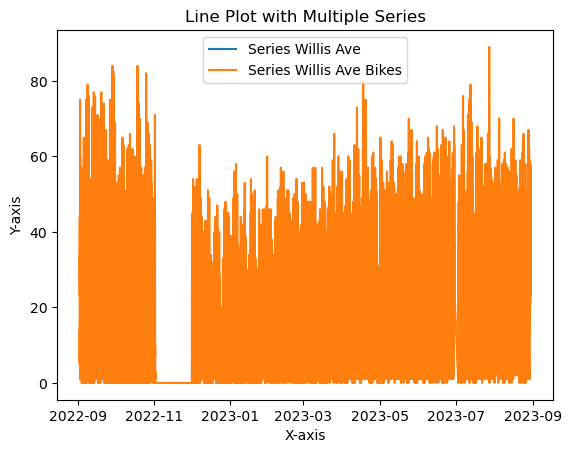

In [57]:
# visually inspect some counters that might be continuations of one another


# Get unique IDs
unique_ids = ['Willis Ave', 'Willis Ave Bikes']

# Create a line plot for each series
for id in unique_ids:
    series_data = data[data['name'] == id]
    plt.plot(series_data['date'], series_data['counts'], label=f'Series {id}')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot with Multiple Series')
plt.legend()

# Display the plot
plt.show()

In [71]:
# get the first and last date of each counter
first_dates = data.groupby('name')['date'].min()
last_dates = data.groupby('name')['date'].max()

counter_dates = pd.DataFrame({'first': first_dates, 'last':last_dates}).sort_values(by='last')
counter_dates['runtime'] = (counter_dates['last'] - counter_dates['first']).dt.days
counter_dates.sort_values(by='runtime')

,first,last,runtime
name,,,
Willis Ave Bikes,2022-09-02 11:15:00,2023-08-29 23:45:00,361
Fountain Ave,2022-08-23 10:30:00,2023-08-29 23:45:00,371
111th St at 50th Ave,2022-05-09 15:00:00,2023-08-27 23:45:00,475
Kent Ave btw South 6th St. and Broadway,2014-08-14 00:00:00,2016-11-21 23:45:00,830
Columbus Ave at 86th St.,2019-10-24 00:00:00,2023-08-28 23:45:00,1404
Amsterdam Ave at 86th St.,2019-10-24 00:00:00,2023-08-29 23:45:00,1405
2nd Avenue - 26th St S,2015-05-22 09:15:00,2019-06-11 23:45:00,1481
8th Ave at 50th St.,2018-06-14 00:00:00,2023-08-25 23:45:00,1898
Pulaski Bridge,2017-06-24 00:00:00,2023-08-29 23:45:00,2257


In [72]:
# the two kent ave counters about 10 blocks from one another, let's combine them
data.loc[data['name']=='Kent Ave btw South 6th St. and Broadway', ['name', 'id', 'latitude', 'longitude']] = ('Kent Ave Comprehensive', 999999999, 40.720959, -73.960930)

data.loc[data['name']=='Kent Ave btw North 8th St and North 9th St', ['name', 'id']] = ('Kent Ave Comprehensive', 999999999)

# groupby hour

In [77]:
data[['date','name', 'id', 'counts']].groupby([data['date'].dt.hour, data['name']]).agg(
    {'id': 'mean',
    'counts':'mean',
    }
).reset_index()

,date,name,id,counts
0,0,111th St at 50th Ave,300024007.0,0.679336
1,0,1st Avenue - 26th St N - Interference testing,100010020.0,31.654930
2,0,2nd Avenue - 26th St S,100009424.0,7.377026
3,0,8th Ave at 50th St.,100057316.0,11.593768
4,0,Amsterdam Ave at 86th St.,100057319.0,11.902600
...,...,...,...,...
403,23,Prospect Park West,100009425.0,19.874144
404,23,Pulaski Bridge,100010018.0,9.526088
405,23,Staten Island Ferry,100010017.0,3.103789
406,23,Williamsburg Bridge Bike Path,100009427.0,38.539322
